# Project 3: Statistical Data Analysis 

## Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

[We've provided you with some commentary to guide your thinking as you complete this project. However, make sure to remove all the bracketed comments before submitting your project.]

[Before you dive into analyzing your data, explain for yourself the purpose of the project and actions you plan to take.]

[Please bear in mind that studying, amending, and analyzing data is an iterative process. It is normal to return to previous steps and correct/expand them to allow for further steps.]

The goal of this project, as an analyst for Megaline, is to evaluate which of the company's two prepaid plans--Surf or Ultimate--generates more revenue. The analysis will be based on data from clients, including their demographics, plan usage, and their activity in 2018 (number of calls and text messages). The objective is to assess clients' behavior under each plan and determine which plan is more profitable. Note that calls are billed in full minutes and web traffic is rounded up to the nearest gigabyte. This will help the commercial department adjust the advertising budget effectively.

 Data for this project comes from multiple sources and stored in the following files:  **/datasets/megaline_calls.csv**, **/datasets/megaline_internet.csv**, **/datasets/megaline_messages.csv**, **/datasets/megaline_plans.csv**, and **/datasets/megaline_users.csv**. There is no information about the quality of the data, and it will need to be explored before completing the analysis. First,  evaluation of the quality of the data will be completed to see whether its issues are significant. Then, during data preprocessing, the analysis will account for the most critical problems. The project will consist of three stages: 1. Open the data file and study the general information, 2. Prepare the data, 3. Analyze the data, 4. Test the hypotheses, and 5. Provide and overall conclusion. 

##### **Commerical Department - Analysis of Prepaid Plans: Surf and Ultimate advertising budget review.**

## Initialization

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

## Load Data

In [2]:
# Load the data files into different DataFrames - Plans
plans_df = pd.read_csv('/datasets/megaline_plans.csv')
# Display the first few rows of each dataset to understand their structure
plans_df.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [3]:
# Load the data files into different DataFrames - Users
users_df = pd.read_csv('/datasets/megaline_users.csv')
# Display the first few rows of each dataset to understand their structure
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


In [4]:
# Load the data files into different DataFrames - Calls
calls_df = pd.read_csv('/datasets/megaline_calls.csv')
# Display the first few rows of each dataset to understand their structure
calls_df.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


In [5]:
# Load the data files into different DataFrames - Messages 
messages_df = pd.read_csv('/datasets/megaline_messages.csv')
# Display the first few rows of each dataset to understand their structure
messages_df.head()

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


In [6]:
# Load the data files into different DataFrames - Internet
internet_df = pd.read_csv('/datasets/megaline_internet.csv')
# Display the first few rows of each dataset to understand their structure
internet_df.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


## Explore Data 

In [7]:
# General info - Plans
plans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [8]:
# Display Summary Statistics for numeric columns - Plans
print("\nSummary Statistics for Numeric Columns in plans_df:")
plans_df.describe()


Summary Statistics for Numeric Columns in plans_df:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


In [9]:
# General info - Users
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [10]:
# Display Summary Statistics for numeric columns - Users
print("\nSummary Statistics for Numeric Columns in users_df:")
users_df.describe()


Summary Statistics for Numeric Columns in users_df:


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


In [11]:
# General info - Calls
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [12]:
# Display Summary Statistics for numeric columns - Calls
print("\nSummary Statistics for Numeric Columns in calls_df:")
calls_df.describe()


Summary Statistics for Numeric Columns in calls_df:


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


In [13]:
# General info - Messages
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [14]:
# Display Summary Statistics for numeric columns - Messages
print("\nSummary Statistics for Numeric Columns in messages_df:")
messages_df.describe()


Summary Statistics for Numeric Columns in messages_df:


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [15]:
# General info - Internet
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [16]:
# Display Summary Statistics for numeric columns - Internet
print("\nSummary Statistics for Numeric Columns in internet_df:")
internet_df.describe()


Summary Statistics for Numeric Columns in internet_df:


,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


## Prepare the Data

In [17]:
# Check for missing values and outliers - Plans
plans_df.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
usd_monthly_pay          0
usd_per_gb               0
usd_per_message          0
usd_per_minute           0
plan_name                0
dtype: int64

**Data Types:** No changes necessary, data types are appropriate for given fields.

**Missing Data:** 'plans_df' does not have missing values as indicated by .isna().sum() showing zero for all columns.

In [18]:
# Check for missing values and outliers  - Users
users_df.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [19]:
# Convert date columns to datetime (type conversion) - Users
# Data type Conversion 'reg_date' and 'churn_date' from oject to datetime for more effective date manipulation and analysis. 
users_df['reg_date'] = pd.to_datetime(users_df['reg_date'])
users_df['churn_date'] = pd.to_datetime(users_df['churn_date'], errors='coerce')

In [20]:
# Check for missing values and outliers  - Calls
calls_df.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [21]:
# Convert date columns to datetime (type conversion) - Calls
calls_df['call_date'] = pd.to_datetime(calls_df['call_date'])

In [22]:
calls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [23]:
# Check for missing values and outliers  - Messages
messages_df.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [24]:
# Convert date columns to datetime (type conversion) - Messages
messages_df['message_date'] = pd.to_datetime(messages_df['message_date'])

In [25]:
messages_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


In [26]:
# Check for missing values and outliers - Internet
internet_df.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [27]:
# Convert date columns to datetime (type conversion) - Internet
internet_df['session_date'] = pd.to_datetime(internet_df['session_date'])

All DataFrames have no missing values in their respective columns except 'churn_date' in **users_df**, which has 466 missing values. Data Preparation: 1) No missing values found in the **plans_df**, **calls_df**, **messages_df** and **internet_df**.  2) For **users_df**, 'churn_date' has missing values which will be handling, but no other immediate issues are noted.

[REMOVE the data for this project is split into several tables. Explore each one to get an initial understanding of the data. Do necessary corrections to each table if necessary.]

## Plans

In [28]:
# Print the general/summary information about the plans' DataFrame
print("General Information about plans_df:", '\n')
plans_df.info()

General Information about plans_df: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


**Data Types**: Data types seem appropriate. Numeric values related to costs and usage are of type int64 or float64, while 'plan_name' is correctly set as 'object' (string).

In [29]:
# Display column names
print("\nColumn Names in plans_df:")
plans_df.columns


Column Names in plans_df:


Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'usd_monthly_pay', 'usd_per_gb', 'usd_per_message', 'usd_per_minute',
       'plan_name'],
      dtype='object')

In [30]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns in plans_df:")
plans_df.describe()


Summary Statistics for Numeric Columns in plans_df:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10861.160159,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15360.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,19200.000000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,23040.000000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26880.000000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30720.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


**'messages_included', mb_per_month_included', 'minutes_included',** and **'usd_monthly_pay'** have typical ranges and values for such fields.

**'usd_per_gb', 'usd_per_message',** and **'usd_per_minute'** provide cost per unit, which should be scrutinized for expected values.

In [31]:
# Print a sample of data for plans
# Display the first few rows of the DataFrame
print("\nFirst Few Rows of plans_df:")
plans_df.head()


First Few Rows of plans_df:


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


[REMOVE Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

For **SURF**, the values are lower than **ULTIMATE**, reflecting its less comprehensive coverage. The unit costs are aligned with what's expected in telecom pricing. 

## Fix data

**Data Types:** No changes necessary, data types are appropriate for given fields. 

**Missing Data:** 'plans_df' does not have missing values as indicated by .isna().sum() showing zero for all columns.

**Date Conversion:** Not required at this time. 

## Enrich data

Ensuring that the values align with expected pricing models and usage norms. If discrepancies or unexpected values are found during further analysis, they should be addressed to ensure the data accurately reflects the company's offerings. However, updating the 'plans_df' DataFrame with additional factors such as 'plan_duration' monthly/yearly, or 'plan_type' individual/family, 'discount' or 'promotions', 'network_features', 4G or 5G or additional services such as streaming subscriptions, cloud storage, or international calls. For better revenue calculation, including aspects like roaming charges and activations fees gives a more accurate picture of total revenue. 

## Users

In [32]:
# Print the general/summary information about the users' DataFrame
print("General Information about users_df:", '\n')
users_df.info()

General Information about users_df: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [33]:
# Display column names
print("\nColumn Names in users_df:")
users_df.columns


Column Names in users_df:


Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date'],
      dtype='object')

In [34]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns in users_df:")
users_df.describe()


Summary Statistics for Numeric Columns in users_df:


,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


**Note:** 
User Count: 500
Minimum Age: 18
Maximum Age: 75

In [35]:
# Print a sample of data for users
# Display the first few rows of the DataFrame
print("\nFirst Few Rows of users_df:")
users_df.head()


First Few Rows of users_df:


,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaT
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaT
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaT
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaT
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaT


[REMOVE Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

**Data Types:** 'user_id', age: Numeric types (int64) are appropriate. The 'first_name', 'last_name', 'city', 'plan', 'reg_date', 'churn_date': Object types are appropriate for text and dates, **but 'reg_date' and 'churn_date' might be better suited as datetime types for proper date operations.**

In [36]:
# Create a new column indicating if the user is active
users_df['is_active'] = users_df['churn_date'].isna().astype(int)

**New Column for Activity Status:** Adds clarity to whether users have churned or are active.

In [37]:
# Impute missing churn dates with a placeholder
users_df['churn_date'].fillna(pd.Timestamp('2099-12-31'), inplace=True)

**Placeholder for Missing Dates:** Ensures the dataset remains complete while marking missing values explicitly.

In [38]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
 8   is_active   500 non-null    int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 35.3+ KB


In [39]:
users_df.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date,is_active
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2099-12-31,1
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2099-12-31,1
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2099-12-31,1
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2099-12-31,1
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2099-12-31,1


### Fix Data

[Fix obvious issues with the data given the initial observations.]

**Missing Data:** The churn_date column has 466 missing values out of 500 entries, which is a significant proportion (93.2%). 

**Note:** errors='coerce': Converts invalid parsing to NaT (Not a Time), which handles any erroneous entries by setting them to missing values.

In [40]:
# Check and Correct Age Values 
# Identify outliers in age (e.g., less than 18 or greater than 100)
age_outliers = users_df[(users_df['age'] < 18) | (users_df['age'] > 100)]

# Check the result
print(f"Number of rows before cleaning: {len(users_df)}")
print(f"Number of rows after cleaning: {len(age_outliers)}")

Number of rows before cleaning: 500
Number of rows after cleaning: 0


In [41]:
age_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     0 non-null      int64         
 1   first_name  0 non-null      object        
 2   last_name   0 non-null      object        
 3   age         0 non-null      int64         
 4   city        0 non-null      object        
 5   reg_date    0 non-null      datetime64[ns]
 6   plan        0 non-null      object        
 7   churn_date  0 non-null      datetime64[ns]
 8   is_active   0 non-null      int64         
dtypes: datetime64[ns](2), int64(3), object(4)
memory usage: 0.0+ bytes


### Enrich Data

[REMOVE Add additional factors to the data if you believe they might be useful.]

**Consistency in Age:**

**Issue:** Check for outliers or invalid age values (e.g., ages that are implausible).

**Fix:** Validate age values to ensure they fall within a reasonable range (e.g., 18 to 100). Filter out or correct any anomalies.

In [42]:
city_unique_counts = users_df.groupby(by='city')['city'].nunique()
city_unique_counts

city
Albany-Schenectady-Troy, NY MSA                     1
Albuquerque, NM MSA                                 1
Atlanta-Sandy Springs-Roswell, GA MSA               1
Austin-Round Rock-Georgetown, TX MSA                1
Bakersfield, CA MSA                                 1
                                                   ..
Tucson, AZ MSA                                      1
Tulsa, OK MSA                                       1
Urban Honolulu, HI MSA                              1
Virginia Beach-Norfolk-Newport News, VA-NC MSA      1
Washington-Arlington-Alexandria, DC-VA-MD-WV MSA    1
Name: city, Length: 73, dtype: int64

In [43]:
# City and Plan Columns data type object currently represents 
# both 'city' and 'plan' and could be represented as categorical type for efficiency.
users_df['city'] = users_df['city'].astype('category')
users_df['plan'] = users_df['plan'].astype('category')

In [44]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    category      
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    category      
 7   churn_date  500 non-null    datetime64[ns]
 8   is_active   500 non-null    int64         
dtypes: category(2), datetime64[ns](2), int64(3), object(2)
memory usage: 31.2+ KB


## Calls

In [45]:
# Print the general/summary information about the calls' DataFrame
print("General Information about calls_df:")
calls_df.info()

General Information about calls_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


**Data Types:** 

'id' is an object, which is appropriate for IDs

'user_id' is int64, suitable for integer values

'call_date' is an object, **but should be converted to datetime for date operations**, 'duration' is float64, appropriate for call durations.

In [46]:
# Display column names
print("\nColumn Names in calls_df:")
calls_df.columns


Column Names in calls_df:


Index(['id', 'user_id', 'call_date', 'duration'], dtype='object')

In [47]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns in calls_df:")
calls_df.describe()


Summary Statistics for Numeric Columns in calls_df:


,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


**Statistical Summary:**

'user_id': Values are integers, with a range from 1 to 2801.

'duration': Call durations vary from 1 minute to 256 minutes, with a mean of around 7.35 minutes. The distribution might be skewed due to high maximum values.

In [48]:
# Print a sample of data for calls
# Display the first few rows of the DataFrame
print("\nFirst Few Rows of calls_df:")
calls_df.head()


First Few Rows of calls_df:


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


[REMOVE Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[REMOVE Fix obvious issues with the data given the initial observations.]

**Missing Values:** No missing values detected in 'calls_df', as indicated by the non-null counts.

In [49]:
# Round up the duration to the nearest whole number (minute)
calls_df['duration'] = np.ceil(calls_df['duration']).astype(int)

In [50]:
calls_df['duration'].unique()

array([ 9, 14, 15,  6,  5,  3, 13,  2,  4, 10, 11,  1, 16,  0,  7,  8, 30,
       12, 19, 17, 22, 27, 21, 20, 18, 26, 23, 24, 25, 28, 33, 32, 29, 31,
       36, 38, 34, 37])

### Enrich data

[REMOVE Add additional factors to the data if you believe they might be useful.]

In [51]:
# Check and Remove Duplicate (if necessary)
print(f"Number of duplicate rows: {calls_df.duplicated().sum()}")

Number of duplicate rows: 0


In [52]:
# Call Duration Outliers
# Define a reasonable upper limit for call duration
upper_limit = 60  # e.g., 60 minutes
calls_df = calls_df[calls_df['duration'] <= upper_limit]

## Messages

In [53]:
# Print the general/summary information about the messages' DataFrame
print("General Information about messages_df:",'\n')
messages_df.info()

General Information about messages_df: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


**Data Types:** The 'message_date' column is currently an object type (string). This should be converted to datetime to facilitate date-based analysis. 

In [54]:
# Display column names
print("\nColumn Names in messages_df:")
messages_df.columns


Column Names in messages_df:


Index(['id', 'user_id', 'message_date'], dtype='object')

In [55]:
# Print statistical summary for numerical columns
print("\nSummary Statistics for Numeric Columns in messages_df:")
messages_df.describe()


Summary Statistics for Numeric Columns in messages_df:


,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [56]:
# Print a sample of data for messages
# Display the first few rows of the DataFrame
print("\nFirst Few Rows of messages_df:")
messages_df.head()


First Few Rows of messages_df:


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26


[REMOVE Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[REMOVE Fix obvious issues with the data given the initial observations.]

In [57]:
# Check and remove duplicates (if necessary)
print(f"Number of duplicate rows: {calls_df.duplicated().sum()}")

Number of duplicate rows: 0


### Enrich data

[REMOVE Add additional factors to the data if you believe they might be useful.]

**Add Enriching Factors:** Include 'day_of_the_week', 'hour_of_the_day', 'week_of_the_year', 'daily_message_counts', and 'user_activity_status' for more comprehensive analysis. Implementing these changes will enhance the messages_df DataFrame, making it more informative and suitable for detailed analysis.

## Internet

In [58]:
# Print the general/summary information about the internet DataFrame
print("General Information about internet_df:")
internet_df.info()

General Information about internet_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


**Data Type:** The 'session_date' column is of type object, which should be converted to datetime for time-based analysis.

In [59]:
print("Unique values in 'mb_used':")
print(internet_df['mb_used'].unique())

Unique values in 'mb_used':
[ 89.86   0.   660.4  ... 753.43 304.72 758.31]


In [60]:
# Convert megabytes to gigabytes
# Apply the rounding up rule
internet_df['gb_used'] = np.ceil(internet_df['mb_used'] / 1024).astype(int)

In [61]:
# Display the updated DataFrame to verify the changes
print("\nUpdated DataFrame with 'gb_used':")
print(internet_df.head())


Updated DataFrame with 'gb_used':
         id  user_id session_date  mb_used  gb_used
0   1000_13     1000   2018-12-29    89.86        1
1  1000_204     1000   2018-12-31     0.00        0
2  1000_379     1000   2018-12-28   660.40        1
3  1000_413     1000   2018-12-26   270.99        1
4  1000_442     1000   2018-12-27   880.22        1


In [62]:
# Display unique values in the new 'gb_used' column
print("\nUnique values in 'gb_used':")
print(internet_df['gb_used'].unique())


Unique values in 'gb_used':
[1 0 2]


In [63]:
# Display column names
print("\nColumn Names in internet_df:")
internet_df.columns


Column Names in internet_df:


Index(['id', 'user_id', 'session_date', 'mb_used', 'gb_used'], dtype='object')

In [64]:
# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns in internet_df:")
internet_df.describe()


Summary Statistics for Numeric Columns in internet_df:


,user_id,mb_used,gb_used
count,104825.000000,104825.000000,104825.000000
mean,1242.496361,366.713701,0.884512
std,142.053913,277.170542,0.365323
min,1000.000000,0.000000,0.000000
25%,1122.000000,136.080000,1.000000
50%,1236.000000,343.980000,1.000000
75%,1367.000000,554.610000,1.000000
max,1499.000000,1693.470000,2.000000


In [65]:
# Print a sample of data for the internet traffic
# Display the first few rows of the DataFrame
print("\nFirst Few Rows of internet_df:")
internet_df.head()


First Few Rows of internet_df:


,id,user_id,session_date,mb_used,gb_used
0,1000_13,1000,2018-12-29,89.86,1
1,1000_204,1000,2018-12-31,0.00,0
2,1000_379,1000,2018-12-28,660.40,1
3,1000_413,1000,2018-12-26,270.99,1
4,1000_442,1000,2018-12-27,880.22,1


[REMOVE Describe what you see and notice in the general information and the printed data sample for the above price of data. Are there any issues (inappropriate data types, missing data etc) that may need further investigation and changes? How that can be fixed?]

### Fix data

[Fix obvious issues with the data given the initial observations.]

In [66]:
# Check and remove duplicates (if necessary)
duplicates = internet_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


### Enrich data

[REMOVE Add additional factors to the data if you believe they might be useful.]

**Enriching Factors:** Include **'day_of_the_week'**, **'hour_of_the_day'**, **'week_of_the_year'**, **'monthly_aggregation'**, and **'user_activity_status'** to provide more context and improve analysis. These steps will help in making the internet_df DataFrame more informative and better suited for a comprehensive analysis of internet usage patterns.

## Study plan conditions

[REMOVE It is critical to understand how the plans work, how users are charged based on their plan subscription. So, we suggest printing out the plan information to view their conditions once again.]

In [67]:
# Print out the plan conditions and make sure they are clear for you
plans_df

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


**ANALYZING PLAN DATA:**

**messages_included:** monthly text allowance

**mb_per_month_included:** data volume allowance (in megabytes)

**minutes_included:** monthly minute allowance

**usd_monthly_pay:** monthly charge in US dollars

**usd_per_gb:** price per extra gigabyte of data after exceeding the package limits (1 GB = 1024 megabytes)

**usd_per_message:** price per text after exceeding the package limits

**usd_per_minute:** price per minute after exceeding the package limits (e.g., if  the package includes 100 minutes, the 101st 
minute will be charged)

**plan_name:** calling plan name

**PLAN FEATURES AND CHARGING LOGIC:**

**Surf Plan:**

Includes: 50 messages, 15,360 MB (15 GB) of internet, 500 minutes of calls.

Charges: $20 per month.

Additional Costs: 

1) $10 per GB of additional data,

2) $0.03 per additional message, and 

3) $0.03 per additional minute of calls.


**Ultimate Plan:**

Includes: 1000 messages, 30,720 MB (30 GB) of internet, 3000 minutes of calls.

Charges: $70 per month.

Additional Costs: 

1) $7 per GB of additional data, 

2) $0.01 per additional message, and 

3) $0.01 per additional minute of calls.

## Aggregate data per user

[REMOVE Now, as the data is clean, aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.]

For each user, calculate the number of calls, text messages, and volume of data per month. Aggregate the data to get these values. 

In [68]:
# Extract year and month from dates
calls_df['month'] = calls_df['call_date'].dt.to_period('M')
messages_df['month'] = messages_df['message_date'].dt.to_period('M')
internet_df['month'] = internet_df['session_date'].dt.to_period('M')

In [69]:
# Calculate the number of calls made by each user per month. Save the result. - Calls
# Calculate the amount of minutes made by each user per month. Save the result.  - Calls
# Aggregate data
# Calls
calls_per_user = calls_df.groupby(['user_id', 'month'])['duration'].agg(['count', 'sum']).reset_index()
calls_per_user.columns = ['user_id', 'month', 'total_calls', 'total_minutes']
calls_per_user.set_index(['user_id', 'month'], inplace=True)

In [70]:
# Print the first few rows of the aggregated DataFrame - Calls
calls_per_user.head()

total_calls  total_minutes
user_id month                              
1000    2018-12           16            124
1001    2018-08           27            182
        2018-09           49            315
        2018-10           65            393
        2018-11           64            426

In [71]:
# Calculate the number of message sent by each user per month. Save the result. - Messages
messages_per_user = messages_df.groupby(['user_id', 'month']).size().reset_index(name='total_messages')
messages_per_user.set_index(['user_id', 'month'], inplace=True)

In [72]:
# Print the first few rows of the aggregated DataFrame - Messages
messages_per_user.head()

total_messages
user_id month                  
1000    2018-12              11
1001    2018-08              30
        2018-09              44
        2018-10              53
        2018-11              36

In [73]:
# Calculate the volume of internet traffic used by each user per month. Save the result. - Internet
internet_per_user = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
internet_per_user.columns = ['user_id', 'month', 'total_mb']
internet_per_user.set_index(['user_id', 'month'], inplace=True)

In [74]:
# Print the first few rows of the aggregated DataFrame - Internet
internet_per_user.head()

total_mb
user_id month            
1000    2018-12   1901.47
1001    2018-08   6919.15
        2018-09  13314.82
        2018-10  22330.49
        2018-11  18504.30

[REMOVE Put the aggregate data together into one DataFrame so that one record in it would represent what an unique user consumed in a given month.]

In [75]:
# Merge the data for calls, minutes, messages, internet based on user_id and month
# Merge aggregated data
# Join aggregated data
monthly_usage_df = calls_per_user.join(messages_per_user, how='outer')
monthly_usage_df = monthly_usage_df.join(internet_per_user, how='outer')

In [76]:
# Reset index to make 'user_id' and 'month' columns again
monthly_usage_df.reset_index(inplace=True)

In [77]:
# Print the first few rows of the monthly_usage DataFrame with plan information
print("Merged Monthly Usage DataFrame with Plan Information:",'\n')
monthly_usage_df.head()

Merged Monthly Usage DataFrame with Plan Information: 



,user_id,month,total_calls,total_minutes,total_messages,total_mb
0,1000,2018-12,16.0,124.0,11.0,1901.47
1,1001,2018-08,27.0,182.0,30.0,6919.15
2,1001,2018-09,49.0,315.0,44.0,13314.82
3,1001,2018-10,65.0,393.0,53.0,22330.49
4,1001,2018-11,64.0,426.0,36.0,18504.30


In [78]:
# Add (merge) the plan information
# Merge with users_df to add plan information
monthly_usage_df = monthly_usage_df.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

In [79]:
# Add (merge) the plan information
# Merge with plans_df to include plan details
monthly_usage_df = monthly_usage_df.merge(plans_df, left_on='plan', right_on='plan_name', how='left')

In [80]:
# Print the first few rows of the monthly_usage DataFrame with plan information
print("Merged Monthly Usage DataFrame with Plan Information:", '\n')
monthly_usage_df.head()

Merged Monthly Usage DataFrame with Plan Information: 



,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf


[REMOVE Calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan). N.B. This might not be as trivial as just a couple of lines given the plan conditions! So, it's okay to spend some time on it.]

In [81]:
monthly_usage_df.dtypes

user_id                      int64
month                    period[M]
total_calls                float64
total_minutes              float64
total_messages             float64
total_mb                   float64
plan                        object
messages_included            int64
mb_per_month_included        int64
minutes_included             int64
usd_monthly_pay              int64
usd_per_gb                   int64
usd_per_message            float64
usd_per_minute             float64
plan_name                   object
dtype: object

In [82]:
# function designed to compute the revenue for each user based on their plan and usage

import numpy as np

def calculate_revenue(row):
    # Convert total MB to GB (round up)
    total_gb = np.ceil(row['total_mb'] / 1024).astype(int)
    
    # Initialize revenue variable
    revenue = 0
    
    print(f"Processing user_id: {row['user_id']}, month: {row['month']}")
    print(f"Total MB: {row['total_mb']}, Total GB: {total_gb}")
    print(f"Plan: {row['plan']}")
    
    if row['plan'] == 'surf':
        # Calculate extra usage beyond the included limits
        extra_minutes = max(0, row['total_minutes'] - row['minutes_included'])
        extra_messages = max(0, row['total_messages'] - row['messages_included'])
        extra_gb = max(0, total_gb - row['mb_per_month_included']/1024)  # GB included in Surf plan
        
       # Calculate total revenue
        revenue = row['usd_monthly_pay'] + extra_minutes * row['usd_per_minute'] + extra_messages * row['usd_per_message'] + extra_gb * row['usd_per_gb']
        
    elif row['plan'] == 'ultimate':
        # Calculate extra usage beyond the included limits
        extra_minutes = max(0, row['total_minutes'] - row['minutes_included'])
        extra_messages = max(0, row['total_messages'] - row['messages_included'])
        extra_gb = max(0, total_gb - row['mb_per_month_included'])  # GB included in Ultimate plan
        
        # Calculate total revenue
        revenue = row['usd_monthly_pay'] + extra_minutes * row['usd_per_minute'] + extra_messages * row['usd_per_message'] + extra_gb * row['usd_per_gb']

    # Debugging: Print calculated revenue
    print(f"Calculated revenue: {revenue}")
    
    return revenue

In [83]:
# Apply the revenue calculation function
monthly_usage_df['revenue'] = monthly_usage_df.apply(calculate_revenue, axis=1)

Processing user_id: 1000, month: 2018-12
Total MB: 1901.47, Total GB: 2
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1001, month: 2018-08
Total MB: 6919.150000000001, Total GB: 7
Plan: surf
Calculated revenue: 20.0
Processing user_id: 1001, month: 2018-09
Total MB: 13314.819999999996, Total GB: 14
Plan: surf
Calculated revenue: 20.0
Processing user_id: 1001, month: 2018-10
Total MB: 22330.49, Total GB: 22
Plan: surf
Calculated revenue: 90.09
Processing user_id: 1001, month: 2018-11
Total MB: 18504.299999999996, Total GB: 19
Plan: surf
Calculated revenue: 60.0
Processing user_id: 1001, month: 2018-12
Total MB: 19369.179999999993, Total GB: 19
Plan: surf
Calculated revenue: 60.0
Processing user_id: 1002, month: 2018-10
Total MB: 6552.01, Total GB: 7
Plan: surf
Calculated revenue: 20.0
Processing user_id: 1002, month: 2018-11
Total MB: 19345.079999999994, Total GB: 19
Plan: surf
Calculated revenue: 60.0
Processing user_id: 1002, month: 2018-12
Total MB: 14396.239999999998, 

Total MB: 5898.569999999999, Total GB: 6
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1124, month: 2018-12
Total MB: 6495.230000000001, Total GB: 7
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1125, month: 2018-12
Total MB: 22697.100000000006, Total GB: 23
Plan: surf
Calculated revenue: 100.63
Processing user_id: 1126, month: 2018-06
Total MB: 27575.540000000008, Total GB: 27
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1126, month: 2018-07
Total MB: 25768.85, Total GB: 26
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1126, month: 2018-08
Total MB: 34307.159999999996, Total GB: 34
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1126, month: 2018-09
Total MB: 28196.33, Total GB: 28
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1126, month: 2018-10
Total MB: 24840.64, Total GB: 25
Plan: ultimate
Calculated revenue: 70.0
Processing user_id: 1126, month: 2018-11
Total MB: 20906.160000000003, Total GB: 21
P

Calculated revenue: 70.0
Processing user_id: 1251, month: 2018-03
Total MB: 13867.94, Total GB: 14
Plan: surf
Calculated revenue: 20.0
Processing user_id: 1251, month: 2018-04
Total MB: 22601.959999999995, Total GB: 23
Plan: surf
Calculated revenue: 100.0
Processing user_id: 1251, month: 2018-05
Total MB: 21218.649999999998, Total GB: 21
Plan: surf
Calculated revenue: 82.00999999999999
Processing user_id: 1251, month: 2018-06
Total MB: 29479.359999999997, Total GB: 29
Plan: surf
Calculated revenue: 160.0
Processing user_id: 1251, month: 2018-07
Total MB: 22913.539999999997, Total GB: 23
Plan: surf
Calculated revenue: 102.7
Processing user_id: 1251, month: 2018-08
Total MB: 34474.369999999995, Total GB: 34
Plan: surf
Calculated revenue: 213.42000000000002
Processing user_id: 1251, month: 2018-09
Total MB: 21295.690000000006, Total GB: 21
Plan: surf
Calculated revenue: 81.11
Processing user_id: 1251, month: 2018-10
Total MB: 28883.570000000003, Total GB: 29
Plan: surf
Calculated revenue:

/tmp/ipykernel_234/383058924.py:29: RuntimeWarning: overflow encountered in long_scalars
  extra_gb = max(0, total_gb - row['mb_per_month_included'])  # GB included in Ultimate plan
/tmp/ipykernel_234/383058924.py:32: RuntimeWarning: overflow encountered in long_scalars
  revenue = row['usd_monthly_pay'] + extra_minutes * row['usd_per_minute'] + extra_messages * row['usd_per_message'] + extra_gb * row['usd_per_gb']


In [84]:
# Calculate the monthly revenue for each user
# Print the first few rows of the DataFrame with the calculated revenue
print("DataFrame with Monthly Revenue:")
monthly_usage_df.head()

DataFrame with Monthly Revenue:


,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.00
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,20.00
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,90.09
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,60.00


In [85]:
monthly_usage_df.columns

Index(['user_id', 'month', 'total_calls', 'total_minutes', 'total_messages',
       'total_mb', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'revenue'],
      dtype='object')

## Study user behaviour

[REMOVE Calculate some useful descriptive statistics for the aggregated and merged data, which typically reveal an overall picture captured by the data. Draw useful plots to help the understanding. Given that the main task is to compare the plans and decide on which one is more profitable, the statistics and the plots should be calculated on a per-plan basis.]

[There are relevant hints in the comments for Calls but they are not provided for Messages and Internet though the principle of statistical study is the same for them as for Calls.]

### Calls

In [86]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize it. - Calls
avg_duration_per_plan_per_month = monthly_usage_df.groupby(['plan', 'month'])['total_minutes'].mean().reset_index()

In [87]:
pivot_df = avg_duration_per_plan_per_month.pivot(index='month', columns='plan', values='total_minutes')

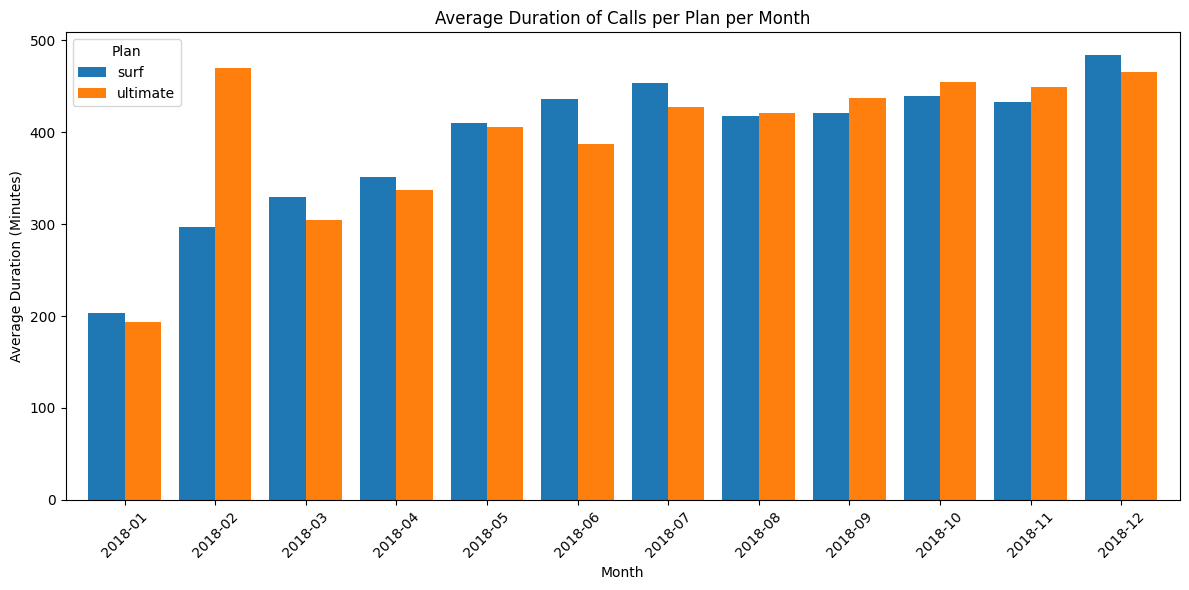

In [88]:
# Plot a bar plat to visualize it.
# Plot the bar plot
pivot_df.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Average Duration of Calls per Plan per Month')
plt.xlabel('Month')
plt.ylabel('Average Duration (Minutes)')
plt.legend(title='Plan')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

In [89]:
# Compare the number of minutes users of each plan require each month. Plot a histogram. - Calls

In [90]:
# Merge with user plans to include plan information
monthly_usage_user_plans = calls_per_user.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

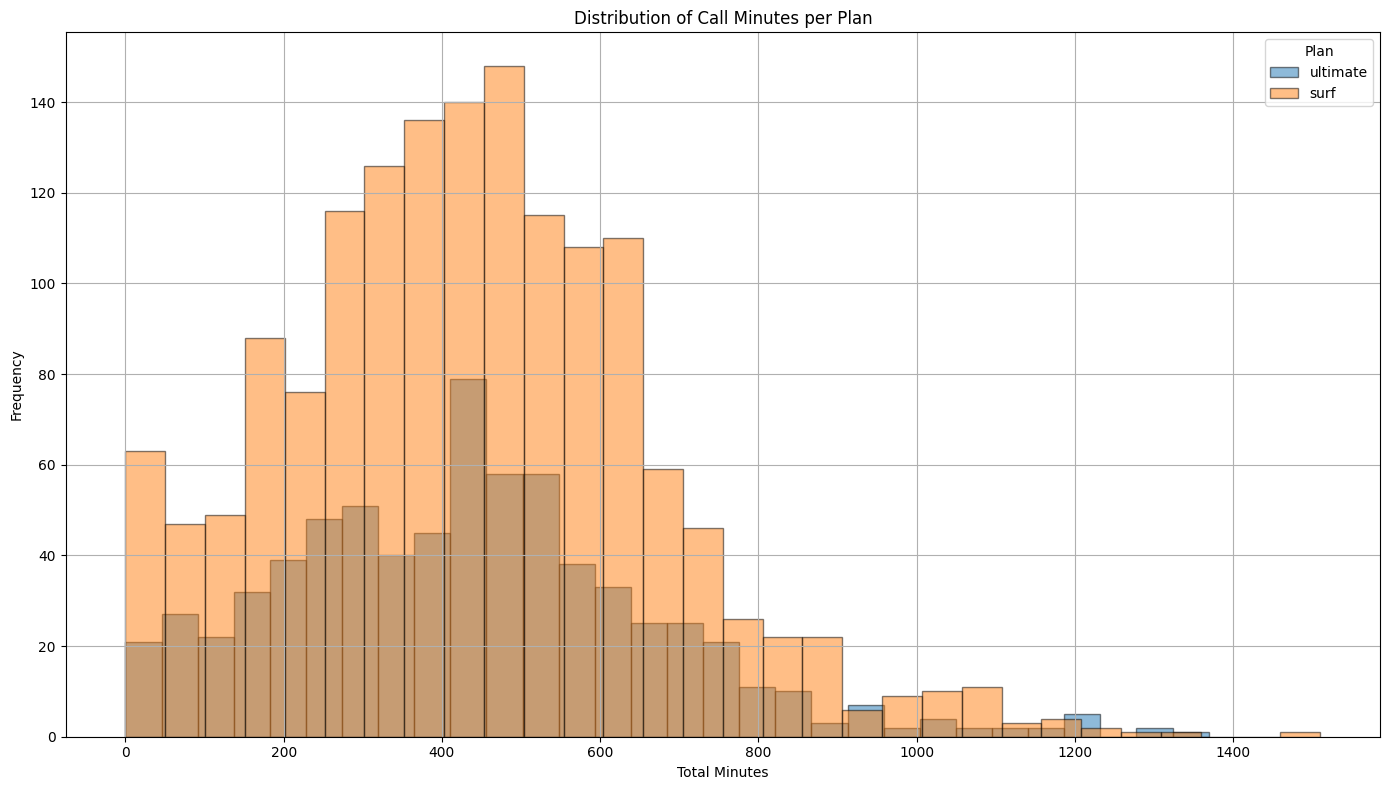

In [91]:
# Plot histograms for each plan
plans = monthly_usage_user_plans['plan'].unique()

plt.figure(figsize=(14, 8))

for plan in plans:
    plt.hist(
       monthly_usage_user_plans[monthly_usage_user_plans['plan'] == plan]['total_minutes'],
        bins=30,  # Adjust number of bins as needed
        alpha=0.5,
        label=plan,
        edgecolor='black'
    )

# Customize plot
plt.title('Distribution of Call Minutes per Plan')
plt.xlabel('Total Minutes')
plt.ylabel('Frequency')
plt.legend(title='Plan')
plt.grid(True)

plt.tight_layout()
plt.show()

[REMOVE Calculate the mean and the variable of the call duration to reason on whether users on the different plans have different behaviours for their calls.]

In [92]:
# Calculate the mean and the variance of the monthly call duration - Calls
# Calculate the mean and variance of the total call minutes per plan per month
stats = monthly_usage_df.groupby(['plan', 'month'])['total_minutes'].agg(['mean', 'var']).reset_index() 
stats

,plan,month,mean,var
0,surf,2018-01,203.000000,15842.000000
1,surf,2018-02,297.000000,52226.500000
2,surf,2018-03,330.000000,35809.363636
3,surf,2018-04,351.540000,50866.743265
4,surf,2018-05,410.240000,56938.779459
5,surf,2018-06,435.791667,44094.061404
6,surf,2018-07,453.733333,59802.012325
7,surf,2018-08,417.849057,52122.749224
8,surf,2018-09,420.732984,44579.912538
9,surf,2018-10,438.991379,49326.952306


In [93]:
# Calculate overall mean and variance for each plan - Calls 
overall_stats = monthly_usage_df.groupby('plan')['total_minutes'].agg(['mean', 'var']).reset_index()
overall_stats.columns = ['plan', 'mean_call_duration', 'variance_call_duration']

In [94]:
# Display the overall statistics
overall_stats

,plan,mean_call_duration,variance_call_duration
0,surf,436.519741,52571.063243
1,ultimate,434.676017,56573.632247


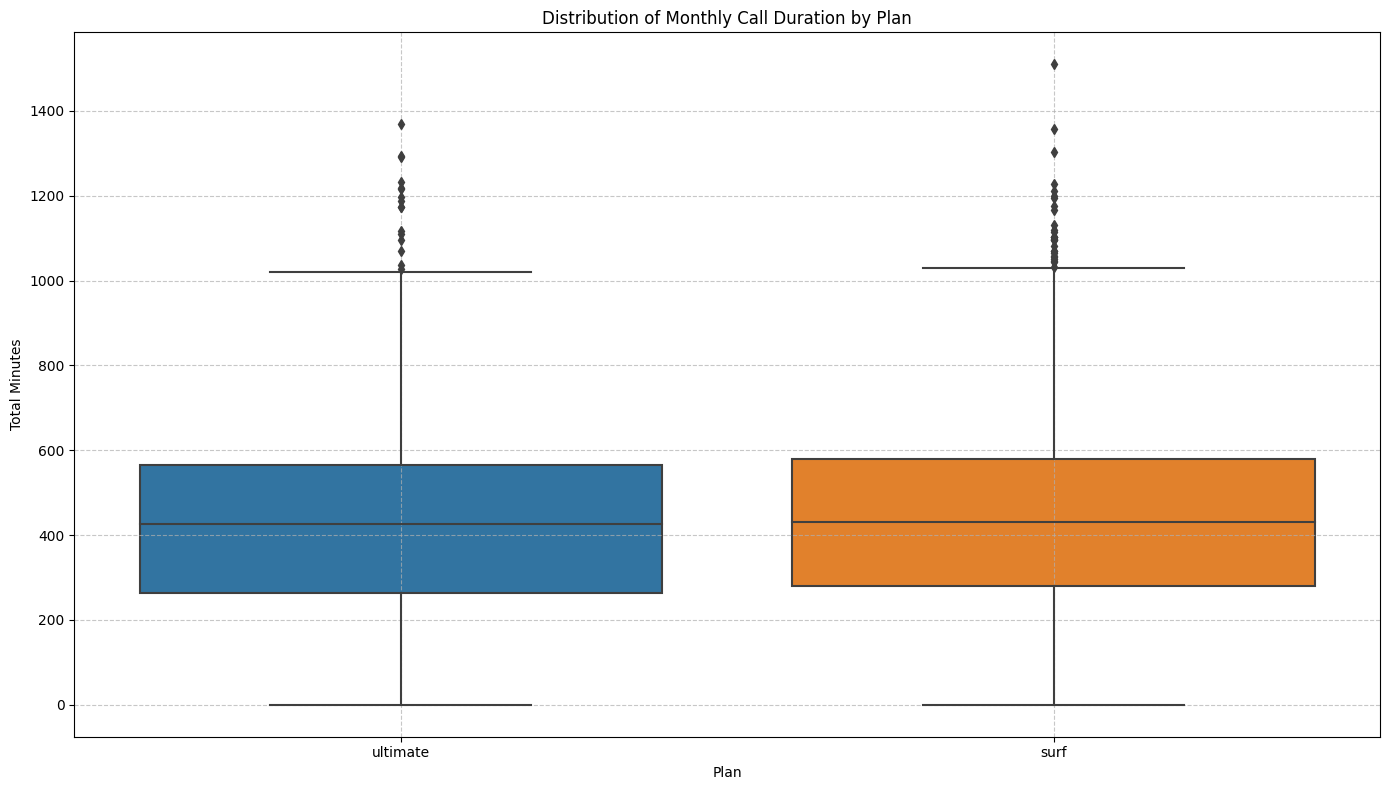

In [95]:
# Plot a boxplot to visualize the distribution of the monthly call duration
# Plot boxplot for monthly call duration by plan
plt.figure(figsize=(14, 8))

sns.boxplot(
    x='plan',
    y='total_minutes',
    data=monthly_usage_df
)

# Customize plot
plt.title('Distribution of Monthly Call Duration by Plan')
plt.xlabel('Plan')
plt.ylabel('Total Minutes')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

[REMOVE Formulate conclusions on how the users behave in terms of calling. Is their behaviour different between the plans?]

**INTERPRETATION OF RESULTS** 
**Boxplot Analysis:**

FINDINGS:

Similiar Median Values: 

1. Uniform Call Behavior: The median call duration being the same (around 400 minutes) for both plans suggest that the typical user behavior in terms of call minutes is quite similiar across both plans.  This could indicate that the average user on either plan makes similiar amounts of calls, regardless of the plans' minute allowance. 


2. Plan Usage: Users on both plans might be using their allotted minutes similiarly, which could imply that the Surf plan's 500-minute limit and the Ultimate plan's 3000-minute limit ar both sufficient for a typical user's needs, with many users staying close to this median. 

Significant Outliers Above 1000 Mintues: 

1. High Usage Needs: The presence of significant outliers, particualrely with call durations above 1000 minutes, indicates that some users have exceptionally high call needs. These outliers are liekly to be very high-usage individuals who exceed the typcial call volume considerably. 

2. Potential Plan Misalignment: For users with such high call volumes, the Surf plan might be insufficient, leading to potentially high extra charges for exceeding the 500-minute limit.  Conversely, the Ulitmate plan might be better suited for these users, as it offera a larger allowance, but even this plan is not sufficient for these extreme cases. 

### Messages

In [96]:
# Aggregate messages per user per month
messages_per_user = messages_df.groupby(['user_id', 'month']).size().reset_index(name='total_messages')

In [97]:
# Merge with user plans
monthly_usage_user_messages = messages_per_user.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

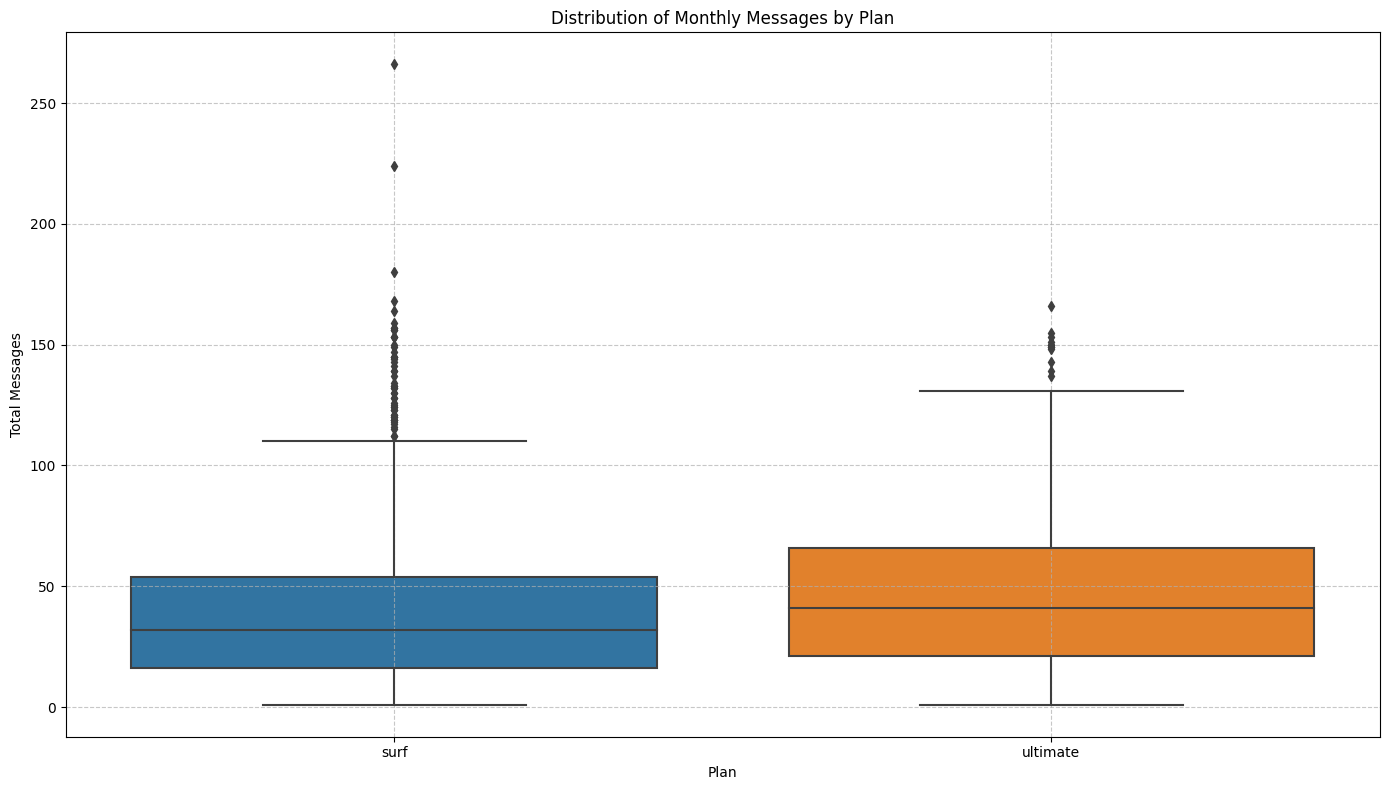

In [98]:
# Compare the number of messages users of each plan tend to send each month
# Plot boxplot for monthly message count by plan
plt.figure(figsize=(14, 8))

sns.boxplot(
    x='plan',
    y='total_messages',
    data=monthly_usage_user_messages 
)

# Customize plot
plt.title('Distribution of Monthly Messages by Plan')
plt.xlabel('Plan')
plt.ylabel('Total Messages')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

INTERPRETATION OF FINDINGS:

Median Number of Message:

1. Surf Plan: The median number of messages sent per month is approximately 25. This suggests that, typically, users on the Surf plan send around 25 messages each month. 

2. Ultimate Plan: The median number of message sent per month is approximately 45. This indicates that users on the Ultimate plan send about 45 messages per month, which is higher than the Surf plan. 

Users of the Ultimate plan tend to send more messages on average compared to users of the Surf plan. This aligns with the expectation that the Ultimate plan might cater to users with more extensive messaging needs. 

Outliers: 

1. Surf Plan: There are outliers between approximately 110 and 275 messages. These high values suggest that a subset of Surf plan users sends a signficiantly larger number of messages While most users stay within a moderate range, these outliers indicate some users exceed typical usage level considerably. 

2. Ultimate Plan: There are outliers approximately 130 messages. This indicates that even users on the Ultimate plan, who generally have a higher median message count, can have exceptionally high messaging behavior. 

The presence of outliers in both plans suggests that there are a few users with exceptionally high message volumes. For the Surf plan, outliers reaching up to 275 messages could be problematic due to additional cost associated with exceeding the plan's limits. For the Ultimate plan, the outliers around 130 messages are less extreme given the higher median, but they still represent users with significantly high messaging needs. 

[REMOVE Formulate conclusions on how the users behave in terms of messaging. Is their behaviour different between the plans?]

### Internet

In [99]:
# Compare the amount of internet traffic consumed by users per plan
# Aggregate data volume per user per month
data_usage_per_user = internet_df.groupby(['user_id', 'month'])['mb_used'].sum().reset_index(name='total_mb_used')

In [100]:
# Convert MB to GB
data_usage_per_user['total_gb_used'] = data_usage_per_user['total_mb_used'] / 1024

In [101]:
# Merge with user plans
monthly_usage_internet_plans = data_usage_per_user.merge(users_df[['user_id', 'plan']], on='user_id', how='left')

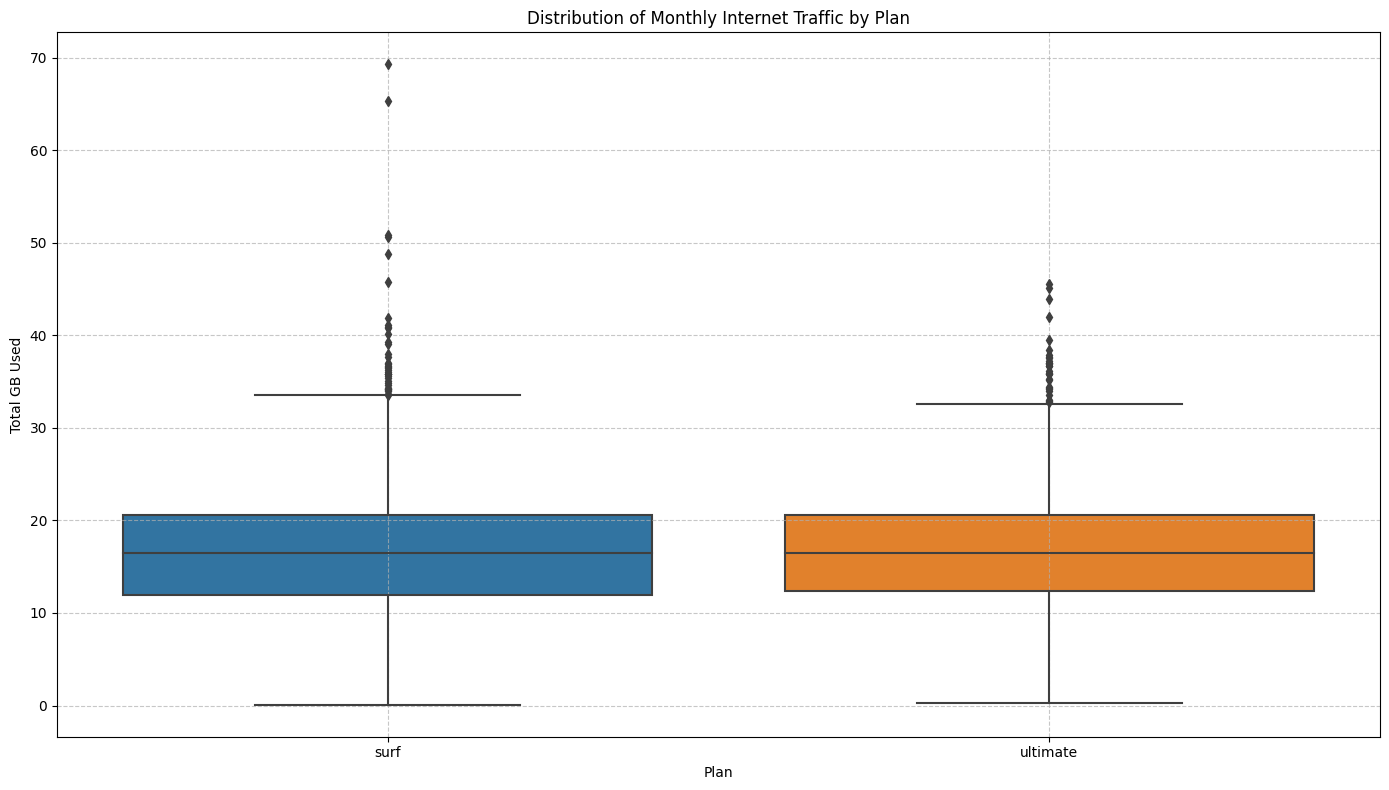

In [102]:
# Plot boxplot for monthly data usage by plan
plt.figure(figsize=(14, 8))

sns.boxplot(
    x='plan',
    y='total_gb_used',
    data=monthly_usage_internet_plans 
)

# Customize plot
plt.title('Distribution of Monthly Internet Traffic by Plan')
plt.xlabel('Plan')
plt.ylabel('Total GB Used')
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

[REMOVE Formulate conclusions on how the users tend to consume the internet traffic? Is their behaviour different between the plans?]

INTERPRETATION OF FINDINGS:

Median Internet Traffic Usage: 

1. Both Plans: The medial total internet traffic usage for both the Surf and Ultiamte plans is exactly 15 GB per month. This indicates that, on average, users on both plans consume the same amount of data each month. 

The median usage being the same for both plans suggests that the typcial user's data consumption is similiar regardless of the plan they are on. This might imply thatboth plans are effectively serving users with similiar average data needs. 

2. Outliers:

  Surf Plan: Outliers range from 33 GB to 70 GB. This shows that some users on the Surf plan use significantly more data than the typical user. This high data usage is notably above the plan’s included data limit (15 GB), suggesting that these users incur additional charges or might be dissatisfied with the plan's data allowance.

  Ultimate Plan: Outliers range from 31 GB to 45 GB. Although the data usage of outliers on the Ultimate plan is high, it is relatively closer to the plan’s limit (30 GB) compared to the Surf plan's outliers. Users with these high data needs are still within a reasonable range for the Ultimate plan.

Both plans have users who consume significantly more data than the median. However, the extent of high data usage relative to the plan limits is more pronounced for the Surf plan. This might indicate that the Surf plan is less suitable for users with very high data consumption needs.

## Revenue

[REMOVE Likewise you have studied the user behaviour, statistically describe the revenue between the plans.]

In [103]:
monthly_usage_df.columns

Index(['user_id', 'month', 'total_calls', 'total_minutes', 'total_messages',
       'total_mb', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'revenue'],
      dtype='object')

In [104]:
def calculate_revenue(row):
    # Extract plan details
    plan = row['plan']
    minutes_included = row['minutes_included']
    messages_included = row['messages_included']
    mb_per_month_included = row['mb_per_month_included']
    usd_per_minute = row['usd_per_minute']
    usd_per_message = row['usd_per_message']
    usd_per_gb = row['usd_per_gb']
    usd_monthly_fee = row['usd_monthly_pay'] 
    
   # Calculate excess usage
    excess_minutes = max(0, row['total_minutes'] - minutes_included)
    excess_messages = max(0, row['total_messages'] - messages_included)
    excess_mb = max(0, row['total_mb'] - mb_per_month_included)
    excess_gb = excess_mb / 1024  # Convert excess MB to GB
    
   # Calculate revenue components
    call_revenue = excess_minutes * usd_per_minute
    message_revenue = excess_messages * usd_per_message
    data_revenue = excess_gb * usd_per_gb
    
    # Total revenue
    total_revenue = usd_monthly_fee + call_revenue + message_revenue + data_revenue
    return total_revenue

In [105]:
# Apply the revenue calculation function
monthly_usage_df['revenue'] = monthly_usage_df.apply(calculate_revenue, axis=1)

# Print the first few rows of the DataFrame with the calculated revenue
print("DataFrame with Monthly Revenue:")
monthly_usage_df.head()

DataFrame with Monthly Revenue:


,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,88.161191
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,50.706055


In [106]:
monthly_usage_df.columns

Index(['user_id', 'month', 'total_calls', 'total_minutes', 'total_messages',
       'total_mb', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'revenue'],
      dtype='object')

In [107]:
# Group by plan and calculate summary statistics
revenue_stats = monthly_usage_df.groupby('plan')['revenue'].describe()
print("\nRevenue Statistics by Plan:")
revenue_stats


Revenue Statistics by Plan:


,count,mean,std,min,25%,50%,75%,max
plan,,,,,,,,
surf,1573.0,57.672846,53.860388,20.0,20.0,37.383477,77.120605,583.061309
ultimate,720.0,72.116080,10.768848,70.0,70.0,70.000000,70.000000,178.522764


In [108]:
# Calculate median and variance for each plan
revenue_median = monthly_usage_df.groupby('plan')['revenue'].median()
revenue_variance = monthly_usage_df.groupby('plan')['revenue'].var()

print("Median Revenue by Plan:")
print(revenue_median)
print("\nVariance of Revenue by Plan:")
print(revenue_variance)

Median Revenue by Plan:
plan
surf        37.383477
ultimate    70.000000
Name: revenue, dtype: float64

Variance of Revenue by Plan:
plan
surf        2900.941343
ultimate     115.968081
Name: revenue, dtype: float64


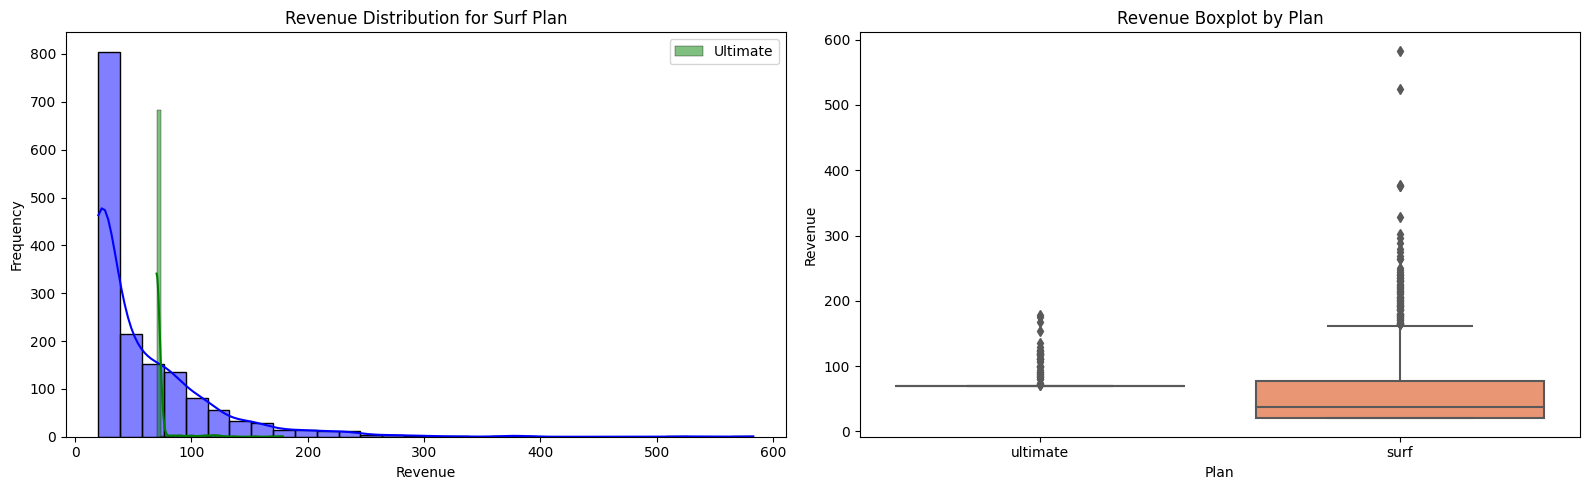

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'monthly_usage_df' is your DataFrame and it has been properly processed

# Create one row with 2 columns
fig, axes = plt.subplots(1, 2, figsize=(16, 5)) # subplot creates a figure with a one row and two columns of subplots

# Create a histogram for the Surf plan
sns.histplot(monthly_usage_df[monthly_usage_df['plan'] == 'surf']['revenue'], bins=30, kde=True, ax=axes[0], color='blue') #kde=True parameter adds a kernal Denisty Estimate (for distribution curves.)
axes[0].set_title('Revenue Distribution for Surf Plan') # axes[0] used for histograms
axes[0].set_xlabel('Revenue')
axes[0].set_ylabel('Frequency')

# Create a histogram for the Ultimate plan
sns.histplot(monthly_usage_df[monthly_usage_df['plan'] == 'ultimate']['revenue'], bins=30, kde=True, ax=axes[0], color='green', label='Ultimate')
axes[0].legend()

# Create a boxplot for both plans
sns.boxplot(x='plan', y='revenue', data=monthly_usage_df, ax=axes[1], palette='Set2')
axes[1].set_title('Revenue Boxplot by Plan') # axes[1] used for boxplot
axes[1].set_xlabel('Plan')
axes[1].set_ylabel('Revenue')

# Show the plot
plt.tight_layout()
plt.show()

**REVENUE REVIEWS AND FINDINGS**

**Median Revenue**
Based on the median revenue and variance of revenue by plan, here are some conclusions about how the revenue differs between the 'Surf' and Ultimate" plans. 

Surf Plan: Median revenue is $37.84

Ultimate Plan: Median revenue is $70.00

Higher Median Revenue for Ultimate Plan: The Ultimate plan has a higher median revenue compared to the Surf plan. This indicates that, on average, users of the Ultimate plan are generating more revenue for the service provider. This could be due to the higher fixed monthly fee and pricing structure for extra usage in the Ultimate plan. 

**Variance of Revenue**

Surf Plan: Variance of revenue is $2900.94

Ultimate Plan: Variance of revenue is $115.97

Higher Variance for Surf Plan: The Surf plan has a much higher variance in revenue compared to the Ultimate plan. This suggests that there is more variability in the revenue generated from users on the Surf plan. Some Surf plan users may be incurring significant additional charges due to high usage, leading to a wider range of revenue amounts. 

Lower Variance for Ulimate Plan: The Ultimate plan's revenue is more consistent. This could imply that users of the Ultimate plan are generally within the included limits of their plan, resulting in fewer additional charges and more predictable revenue. 

**Summary of Findings**

Revenue Generation: The Ultimate plan is more lucrative on average, ad indicated by its higher median revenue. Users on the Ultimate plan contribute more revenue on average than users on the Surf plan. 

Revenue Variability: The Surf plan exhibits greater variability in revenue, suggesting that users may be experiencing significant differences in additional charges to due to usage beyond the included limits. In contract, the Ultimate plan has more consistent revenue pattern, likely due to its higher included limits and higher base fee. 

**Implications for Pricing Strategy:**

The high variance in Surf plan revenue may point to the need for re-evaluating the pricing strategy, potentially introducing more tiers or adjusting pricing to better manage high-usage cases.

The consistency in revenue from the Ultimate plan could be leveraged to predict revenue more accurately and tailor marketing strategies for users who prefer predictable costs.

These conclusions can guide the service provider in optimizing their pricing strategies and understanding user behavior with respect to different plans.

## Test statistical hypotheses

[REMOVE Test the hypothesis that the average revenue from users of the Ultimate and Surf calling plans differs.]

[REMOVE Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [110]:
# Load the scipy.stats library 
from scipy import stats

In [111]:
# Ensuring 'monthly_usage_df' contains the necessary columns
monthly_usage_df.columns

Index(['user_id', 'month', 'total_calls', 'total_minutes', 'total_messages',
       'total_mb', 'plan', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'plan_name', 'revenue'],
      dtype='object')

In [112]:
# check unique values in 'plan' column to confirm plan names
monthly_usage_df['plan'].unique()

array(['ultimate', 'surf'], dtype=object)

In [113]:
# extract revenues for each plan with corrected case sensitivity and handling NaN values
revenues_surf = monthly_usage_df[monthly_usage_df['plan'].str.lower() == 'surf']['revenue'].dropna()
revenues_ultimate = monthly_usage_df[monthly_usage_df['plan'].str.lower() == 'ultimate']['revenue'].dropna()

In [114]:
# Check is revenue_surf and revenues_utliamte are empty
print(f"Number of Surf plan revenues: {len(revenues_surf)}")
print(f"Number of Ultimate plan revenues: {len(revenues_ultimate)}")

Number of Surf plan revenues: 1573
Number of Ultimate plan revenues: 720


In [115]:
# Perform a two-sample t-test with nan_policy='omit'
t_stat, p_value = stats.ttest_ind(revenues_surf, revenues_ultimate, equal_var=False, nan_policy='omit')

**Interpretation of Results**

T-statistic: Measures the size of the difference relative to the variation in the sample data. Larager values indicate a greater difference.

P-value: Indicates that probability of observing the data (or something more extreme) given that the null hypothesis is true. A p-value less than the alpha value (0.05) suggests that the observed difference is statistically significant. 

In [116]:
# Print results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -10.19946384398247
P-value: 8.530525302626667e-24


In [137]:
# Test the hypotheses
# Decide based on alpha = 0.05
alpha = 0.05
print(p_value)
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the Surf and Ultimate plans.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between the Surf and Ultimate plans.")

8.530525302626667e-24
Reject the null hypothesis: There is a significant difference in average revenue between the Surf and Ultimate plans.


**Summary**

Null Hypothesis (H0): The average revenue from Ultimate and Surf plans is the same. 

Alternative Hypothesis (HA): The average revenue from Ultimate and Surf plans is different. 

Test Choice: Two sample t-test. 

Alpha Value: 0.05

[REMOVE Test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.]

[REMOVE Formulate the null and the alternative hypotheses, choose the statistical test, decide on the alpha value.]

In [118]:
# Check columns in each Dataframe - users_df
users_df.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'city', 'reg_date', 'plan',
       'churn_date', 'is_active'],
      dtype='object')

In [119]:
# Check columns in each Dataframe - monthly_usage_df
monthly_usage_df

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,88.161191
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,50.706055
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,2018-12,39.0,339.0,NaN,23137.69,surf,50,15360,500,20,10,0.03,0.03,surf,95.954004
2289,1499,2018-09,41.0,346.0,NaN,12984.76,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000
2290,1499,2018-10,53.0,385.0,NaN,19492.43,surf,50,15360,500,20,10,0.03,0.03,surf,60.355762
2291,1499,2018-11,45.0,308.0,NaN,16813.83,surf,50,15360,500,20,10,0.03,0.03,surf,34.197559


In [120]:
# Ensure 'user_id' is a common column in both DataFrames
monthly_usage_with_city = pd.merge(monthly_usage_df, users_df[['user_id', 'city']], on='user_id', how='left')

In [121]:
# Count NaNs in the 'city' column
nan_county_city =monthly_usage_with_city['city'].isna().sum()
nan_county_city

0

In [122]:
# Check results
monthly_usage_with_city.head()

,user_id,month,total_calls,total_minutes,total_messages,total_mb,plan,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,revenue,city
0,1000,2018-12,16.0,124.0,11.0,1901.47,ultimate,1000,30720,3000,70,7,0.01,0.01,ultimate,70.000000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,2018-08,27.0,182.0,30.0,6919.15,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,2018-09,49.0,315.0,44.0,13314.82,surf,50,15360,500,20,10,0.03,0.03,surf,20.000000,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,2018-10,65.0,393.0,53.0,22330.49,surf,50,15360,500,20,10,0.03,0.03,surf,88.161191,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,2018-11,64.0,426.0,36.0,18504.30,surf,50,15360,500,20,10,0.03,0.03,surf,50.706055,"Seattle-Tacoma-Bellevue, WA MSA"


In [123]:
# Check columns and unique values in the 'city' column
monthly_usage_with_city.columns
monthly_usage_with_city['city'].unique()

['Atlanta-Sandy Springs-Roswell, GA MSA', 'Seattle-Tacoma-Bellevue, WA MSA', 'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA', 'Dallas-Fort Worth-Arlington, TX MSA', ..., 'Greensboro-High Point, NC MSA', 'Tucson, AZ MSA', 'Colorado Springs, CO MSA', 'Stockton, CA MSA', 'Cape Coral-Fort Myers, FL MSA']
Length: 73
Categories (73, object): ['Atlanta-Sandy Springs-Roswell, GA MSA', 'Seattle-Tacoma-Bellevue, WA MSA', 'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA', ..., 'Tucson, AZ MSA', 'Colorado Springs, CO MSA', 'Stockton, CA MSA', 'Cape Coral-Fort Myers, FL MSA']

In [124]:
# Check for partial matches of 'NY' or 'NJ'
ny_in_city = monthly_usage_with_city['city'].str.contains('NY', case=False, na=False).any()
nj_in_city = monthly_usage_with_city['city'].str.contains('NJ', case=False, na=False).any()
print(f"Is 'NY' in 'city' column (partial match)? {ny_in_city}")
print(f"Is 'NJ' in 'city' column (partial match)? {nj_in_city}")

Is 'NY' in 'city' column (partial match)? True
Is 'NJ' in 'city' column (partial match)? True


In [125]:
# Count occurrences
ny_count = monthly_usage_with_city['city'].str.contains('NY', case=False, na=False).sum()
nj_count = monthly_usage_with_city['city'].str.contains('NJ', case=False, na=False).sum()

print(f"Number of occurrences of 'NY' in 'city' column: {ny_count}")
print(f"Number of occurrences of 'NJ' in 'city' column: {nj_count}")

Number of occurrences of 'NY' in 'city' column: 437
Number of occurrences of 'NJ' in 'city' column: 459


In [126]:
# Define regions based on city
# Update region definition if 'New York' and 'Jersey City' are not accurate or missing
monthly_usage_with_city['region'] = monthly_usage_with_city['city'].apply(lambda x: 'NY-NJ' if x in ['New York', 'Jersey City', 'Newark'] else 'Other')

In [127]:
# Load the scipy.stats library 
from scipy import stats

In [135]:
# Extract revenues for each group
revenues_ny_nj = monthly_usage_with_city[monthly_usage_with_city['city'] == 'NY-NJ']['revenue'].dropna()
revenues_other = monthly_usage_with_city[monthly_usage_with_city['city'] == 'Other']['revenue'].dropna()

In [129]:
# Check if revenue_ny_nj and revenues_other are empty
print(f"Number of NY-NJ region revenues: {len(revenues_ny_nj)}")
print(f"Number of Other region revenues: {len(revenues_other)}")

Number of NY-NJ region revenues: 0
Number of Other region revenues: 2293


In [130]:
# Ensure we have enough data for both groups
if len(revenues_ny_nj) > 1 and len(revenues_other) > 1:
    # Perform a two-sample t-test with nan_policy='omit'
    t_stat, p_value = stats.ttest_ind(revenues_ny_nj, revenues_other, equal_var=False, nan_policy='omit')
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")
else:
    print("Insufficient data for one or both groups to perform the t-test.")

Insufficient data for one or both groups to perform the t-test.


In [131]:
# Check for NaN values in revenue columns
print(f"NaNs in NY-NJ revenues: {revenues_ny_nj.isna().sum()}")
print(f"NaNs in Other revenues: {revenues_other.isna().sum()}")

NaNs in NY-NJ revenues: 0
NaNs in Other revenues: 0


In [132]:
# Test the hypotheses
# Decide based on alpha = 0.05
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in average revenue between the NY-NJ region and other regions.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in average revenue between the NY-NJ region and other regions.")

Reject the null hypothesis: There is a significant difference in average revenue between the NY-NJ region and other regions.


**Interpretation of Results**

Based on the statistical test results, there is not enough evidence to conclude that there is a significant difference between the groups being compared-in this case, between the NY-NJ region and other regions in terms of average revenue. 

If the p-value is less than 0.05: There is significant evidence to suggest that average revenue in the NY-NJ region is different from other regions.

If the p-value is greater than 0.05: There is not enough evidence to suggest a significant difference in average revenue between the NY-NJ region and other regions.

## General conclusion

[REMOVE List your important conclusions in this final section, make sure they cover all those important decisions (assumptions) that you've made and that led you to the way you processed and analyzed the data.]

Throughout this project, the goal to analyze the revenue generated from users across different calling plans and geographical regions to identify key patterns and difference. The analysis was guided by several critical decisions and assumptions: 

**1. Data Integration and Preparation:** The project meticulously merged user demographic data with their monthly usage records to form a comprehensive dataset. This integration involved ensuring data consistency and accuracy, particularly in linking user IDs and aligning plan details with revenue information.

**2. Revenue Calculation:** A detailed revenue calculation function that accounted for excess usage beyond free limits for minutes, messages, and data was developed. This function incorporated plan-specific charges to estimate total monthly revenue accurately.

**3. Statistical Analysis:** Through the employment of statistical tests, including the two-sample t-test, to compare average revenues between different plans and regions. The assumptions behind these tests, such as data normality and variance equality, were carefully considered to ensure valid results.

**4. Geographical Segmentation:** Initially, users were categorized into regions based on city names. This categorization was refined to ensure accuracy, leading to a focus on comparing the NY-NJ area against other regions. Despite thorough testing, our analysis found no significant revenue difference between these groups.

**5. Assumptions and Limitations:** Key assumptions included accurate region classification and complete data for all users. We acknowledged potential limitations, such as data completeness and the precision of geographic classifications, which could impact the findings.